# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

### Шаг 1. Откройте файлы с данными

Мы проводим исследование для сети отелей "Как в гостях". На данный момент компания не требует предоплаты при бронировании номеров, что приводит к убыткам, если гость в итоге отменяет бронь. Наша задача - написать модель, которая будет предсказывать отказ от брони и предлагать такому клиенту внести депозит.

Импорты будем хранить здесь

In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats as st

В нашем распоряжении два файла - с данными для обучения и тестовыми.

In [382]:
data_train = pd.read_csv('/datasets/hotel_train.csv')
data_test = pd.read_csv('/datasets/hotel_test.csv')

In [383]:
data_train

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,84057,0,23.0,2016,December,53,30,2,4,2.0,...,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,December,53,31,2,3,2.0,...,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,...,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,1,7


In [384]:
data_test

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,...,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,...,0,0,0,D,0,0,Transient,0,4,7


In [385]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [386]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

Как видно, это две одинаковые таблицы со составу, но обучающая примерно в два раза больше.

Выведем обе таблицы в виде гистограм и изучим их подробнее

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>],
       [<AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>],
       [<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>],
       [<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'required_car_pa

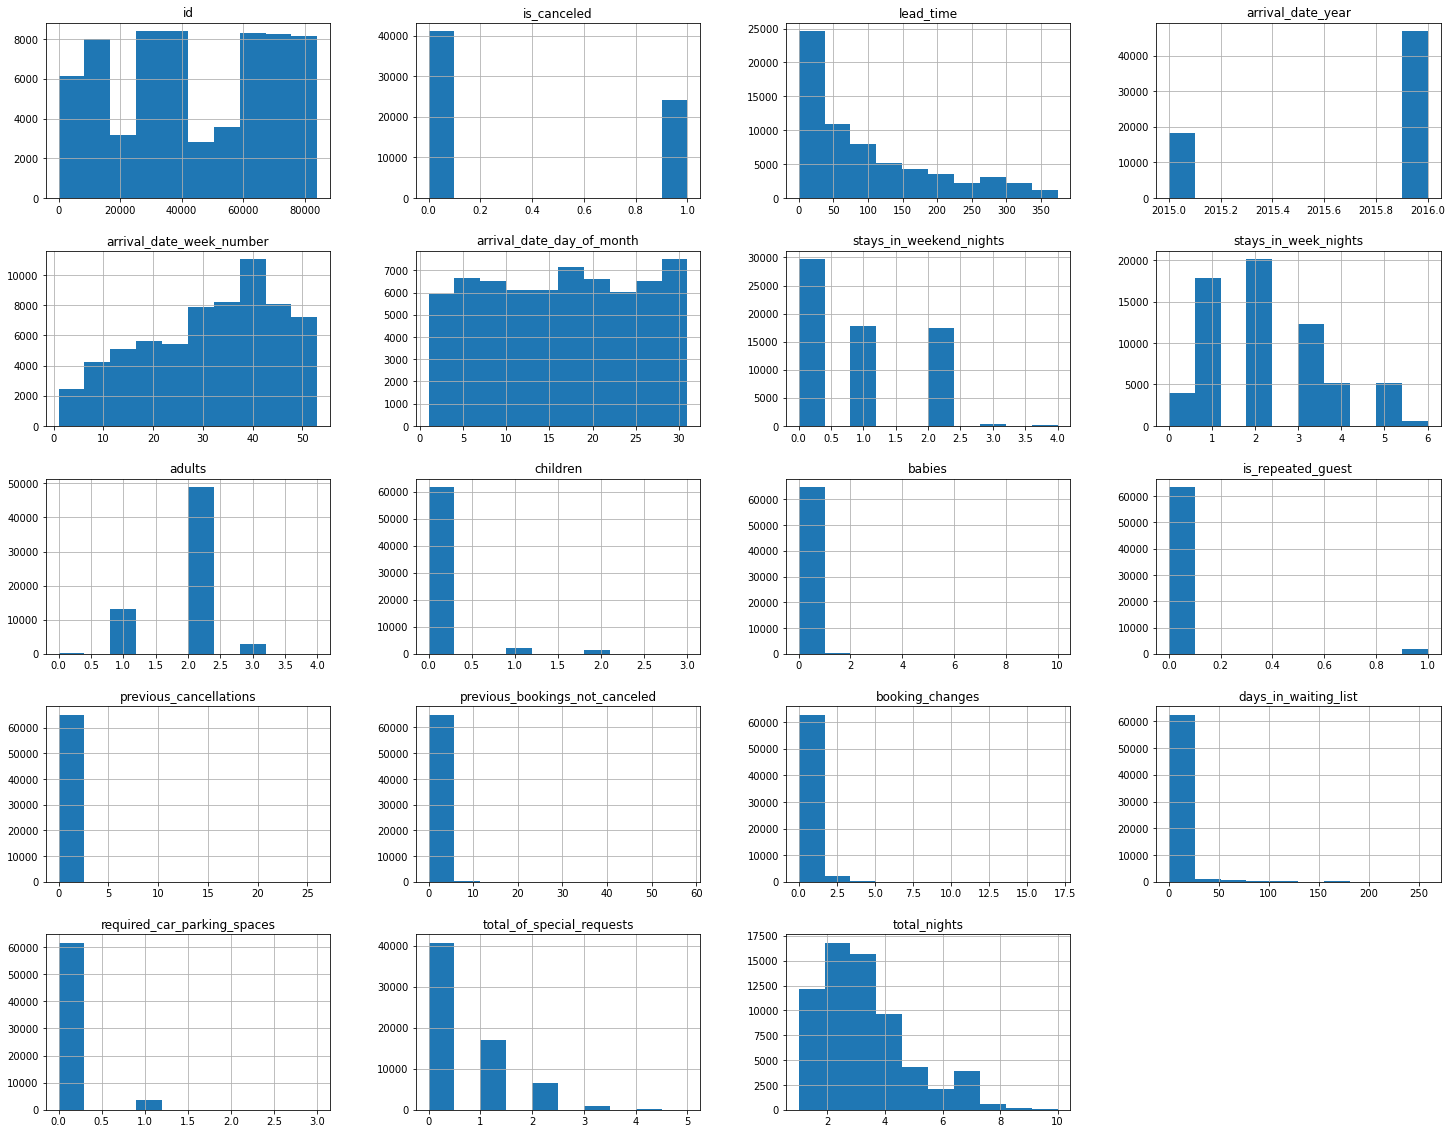

In [387]:
data_train.hist(figsize=(25, 20))

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>],
       [<AxesSubplot:title={'center':'arrival_date_week_number'}>,
        <AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>],
       [<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>],
       [<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'days_in_waiting_list'}>],
       [<AxesSubplot:title={'center':'required_car_pa

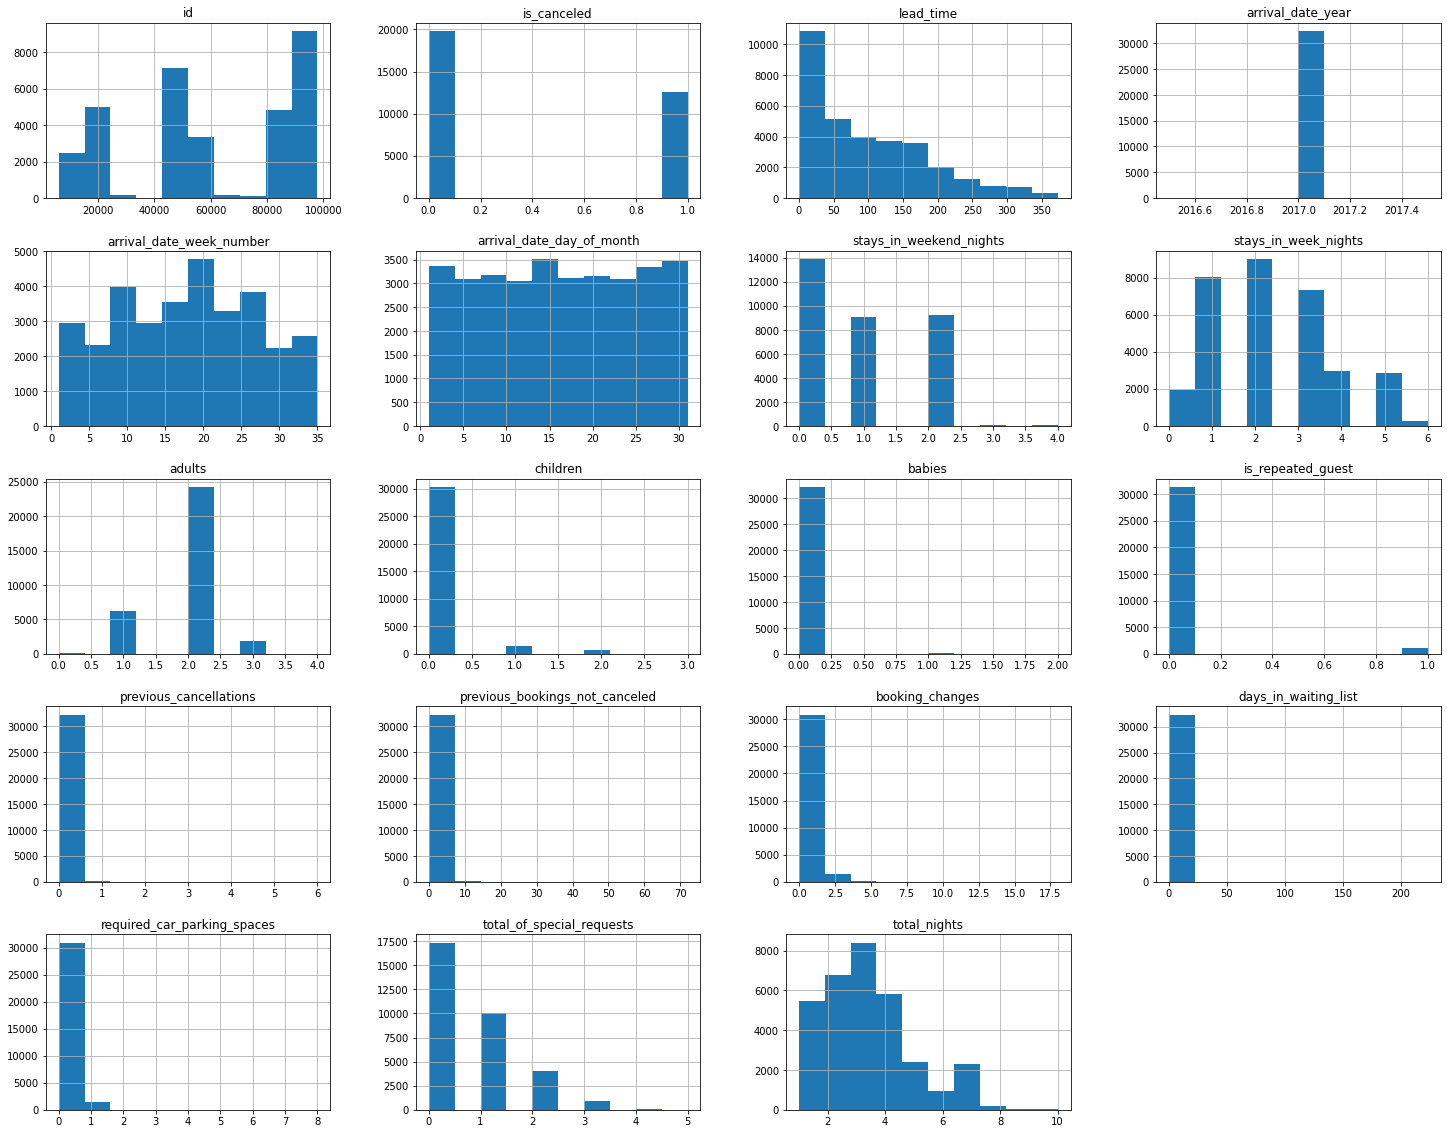

In [388]:
data_test.hist(figsize=(25, 20))

### Шаг 2. Предобработка и исследовательский анализ данных

Проверим данные на пропуски. Судя по всему их нет, все данные на месте.

In [389]:
data_train.isna().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

In [390]:
data_test.isna().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

Повторяющихся строк тоже нет.

In [391]:
data_train.duplicated().sum()

0

In [392]:
data_test.duplicated().sum()

0

In [393]:
data_train = data_train.drop(['id'], axis=1)
data_test = data_test.drop(['id'], axis=1)

In [394]:
data_train.duplicated().sum()

21377

In [395]:
data_test.duplicated().sum()

7717

In [396]:
data_train = data_train.drop_duplicates()

In [397]:
data_test = data_test.drop_duplicates()

In [398]:
data_train.shape

(43852, 24)

In [399]:
data_test.shape

(24695, 24)

В распределении значений id заметны четыре кластера. Выведем, к примеру, значения выше 60_000 для data_train. Возможно, в таком разделении есть какая-то сезонность.

In [403]:
data_train['is_canceled'].value_counts(normalize=True)

0    0.745781
1    0.254219
Name: is_canceled, dtype: float64

In [404]:
data_test['is_canceled'].value_counts(normalize=True)

0    0.684754
1    0.315246
Name: is_canceled, dtype: float64

Можно сказать, что гости достаточно часто отменяют брони - 36-38% случаев.

lead_time показывает, что в как правило между бронированием и днем заезда проходит примерно полтора месяца. Но значительное количество броней осуществляется с прицелом до года. Пока не будем трогать эти данные.

<AxesSubplot:>

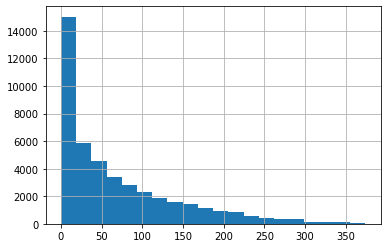

In [405]:
data_train['lead_time'].hist(bins=20)

<AxesSubplot:>

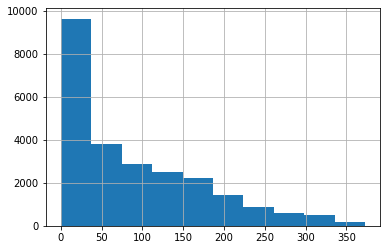

In [406]:
data_test['lead_time'].hist()

В обучающей таблице данные за 2015/2016. Тестировать модель будем на данных 2017.

In [407]:
data_train['arrival_date_year'].value_counts()

2016    34008
2015     9844
Name: arrival_date_year, dtype: int64

In [408]:
data_test['arrival_date_year'].value_counts()

2017    24695
Name: arrival_date_year, dtype: int64

Следующий столбец - месяц прибытия. Здесь есть различия - в тестовых данных отсутствуют последние четыре месяца. 

(Я пробовал удалить эти месяца из обучающей выборки, чтобы категориальные данные в в обоих таблицах совпадали, но это приводит к потере почти половины данных в data_train, а качество модели в итоге не сильно менялось. Не знаю, как правильно в итоге).

In [409]:
data_train['arrival_date_month'].value_counts()

October      5514
September    5212
August       4725
December     4135
November     4099
July         4016
March        3247
April        3219
May          3086
June         2828
February     2300
January      1471
Name: arrival_date_month, dtype: int64

In [410]:
data_test['arrival_date_month'].value_counts()

May         3740
April       3426
June        3334
July        3188
March       3150
February    2768
August      2721
January     2368
Name: arrival_date_month, dtype: int64

Соответственно, если не удалять месяца из data_train, то, наверное, можно данные за последние четыре месяца заменить на медианные, потому что возникает вопрос, насколько это репрезентативно для модели - то, что мы видим сейчас. Пока оставил как есть.

<AxesSubplot:>

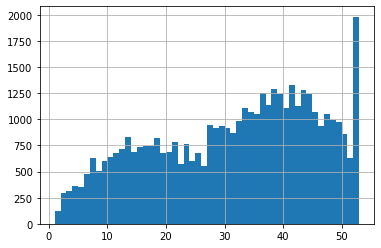

In [411]:
data_train['arrival_date_week_number'].hist(bins=52)

<AxesSubplot:>

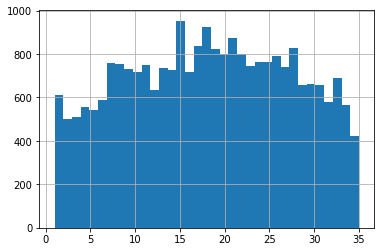

In [412]:
data_test['arrival_date_week_number'].hist(bins=35)

Данные по дням прибытия выглядят достаточно ровно. Какие-то выводы по ним пока сложно сделать.

<AxesSubplot:>

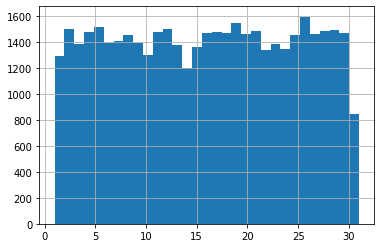

In [413]:
data_train['arrival_date_day_of_month'].hist(bins=31)

<AxesSubplot:>

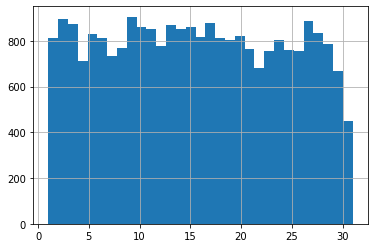

In [414]:
data_test['arrival_date_day_of_month'].hist(bins=31)

Гости достаточно часто проводят на выходных 1-2 ночи. Есть и более высокие значения (3-4 ночи), но их очень мало по сравнению с общим объемом и их можно убрать.

In [415]:
data_train['stays_in_weekend_nights'].value_counts()

0    18376
2    12955
1    12163
3      213
4      145
Name: stays_in_weekend_nights, dtype: int64

In [416]:
data_test['stays_in_weekend_nights'].value_counts()

0    10050
2     7452
1     7033
3       97
4       63
Name: stays_in_weekend_nights, dtype: int64

In [417]:
data_train = data_train.query('stays_in_weekend_nights <= 2')
data_test = data_test.query('stays_in_weekend_nights <= 2')

В данных о количестве проведенных ночей в будни тоже можно убрать редкие значения - 6 ночей.

In [418]:
data_train['stays_in_week_nights'].value_counts()

1    12150
2    11092
3     8627
5     4170
4     4047
0     3051
6      357
Name: stays_in_week_nights, dtype: int64

In [419]:
data_test['stays_in_week_nights'].value_counts()

2    6449
1    6119
3    5386
4    2433
5    2411
0    1587
6     150
Name: stays_in_week_nights, dtype: int64

In [420]:
data_train = data_train.query('stays_in_week_nights != 6')
data_test = data_test.query('stays_in_week_nights != 6')

In [421]:
(data_train[['stays_in_week_nights', 'stays_in_weekend_nights']].sum(axis=1) == data_train['total_nights']).value_counts()

True    43137
dtype: int64

В данных о количестве взрослых есть нулевые значения. В теории можно представить, что в номере жили только дети, если это какая-нибудь экскурсия в другой город или что-то в этом роде. Но так как таких данных немного, то их можно удалить, заодно убрав редкие 4 взрослых.

In [422]:
data_train['adults'].value_counts()

2.0    31720
1.0     8582
3.0     2660
0.0      162
4.0       13
Name: adults, dtype: int64

In [423]:
data_test['adults'].value_counts()

2.0    18290
1.0     4334
3.0     1691
0.0       62
4.0        8
Name: adults, dtype: int64

In [424]:
data_train = data_train.query('adults != 0 and adults != 4')
data_test = data_test.query('adults != 0 and adults != 4')

Здесь также избавимся от редких значений.

In [425]:
data_train['children'].value_counts()

0.0    39781
1.0     2020
2.0     1153
3.0        8
Name: children, dtype: int64

In [426]:
data_test['children'].value_counts()

0.0    22424
1.0     1306
2.0      582
3.0        3
Name: children, dtype: int64

In [427]:
data_train = data_train.query('children != 3')
data_test = data_test.query('children != 3')

Аналогично для столбца babies

In [428]:
data_train['babies'].value_counts()

0.0     42520
1.0       429
2.0         3
9.0         1
10.0        1
Name: babies, dtype: int64

In [429]:
data_test['babies'].value_counts()

0.0    24143
1.0      166
2.0        3
Name: babies, dtype: int64

In [430]:
data_train = data_train.query('babies <= 1')
data_test = data_test.query('babies <= 1')

In [431]:
data_train.rename(columns={'babies': 'has_babies'}, inplace=True)
data_test.rename(columns={'babies': 'has_babies'}, inplace=True)

In [432]:
data_train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'has_babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_nights'],
      dtype='object')

В столбце meal представлены опции заказа:
- SC — нет дополнительных опций;
- BB — включён завтрак;
- HB — включён завтрак и обед;
- FB — включён завтрак, обед и ужин

Оставим здесь все как есть.

In [433]:
data_train['meal'].value_counts()

BB           34837
SC            4614
HB            3215
SC             153
FB             130
Name: meal, dtype: int64

In [434]:
data_test['meal'].value_counts()

BB           18020
SC            4347
HB            1813
SC              99
FB              30
Name: meal, dtype: int64

In [435]:
data_train['meal'].unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
      dtype=object)

In [436]:
data_train['meal'] = data_train['meal'].str.strip()
data_test['meal'] = data_test['meal'].str.strip()

In [437]:
data_train['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

У гостей гостиницы достаточно широкая география. Пока оставим эти данные без изменений.

In [438]:
data_train['country'].unique()

array(['GBR', 'PRT', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'USA', 'DEU',
       'BEL', 'CHE', 'CN', 'GRC', 'NLD', 'ARG', 'RUS', 'SWE', 'POL',
       'EST', 'CZE', 'ITA', 'FIN', 'DNK', 'MOZ', 'BWA', 'LUX', 'BRA',
       'SVN', 'ALB', 'CHN', 'MEX', 'MAR', 'SMR', 'LVA', 'CHL', 'AUT',
       'LTU', 'TUR', 'ISR', 'IND', 'CYM', 'AUS', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'TUN', 'ARE', 'HRV', 'HKG', 'IRN', 'GIB',
       'JEY', 'URY', 'ZAF', 'COL', 'GGY', 'KWT', 'CYP', 'KAZ', 'THA',
       'DOM', 'NGA', 'BLR', 'VEN', 'UKR', 'ARM', 'JPN', 'LKA', 'MYS',
       'BIH', 'MUS', 'OMN', 'SUR', 'JAM', 'BGR', 'CIV', 'SRB', 'JOR',
       'SYR', 'PHL', 'PRI', 'SGP', 'BDI', 'LBN', 'AGO', 'VNM', 'AZE',
       'PLW', 'NZL', 'EGY', 'MDV', 'CMR', 'MLT', 'SVK', 'MWI', 'STP',
       'TWN', 'IDN', 'SEN', 'PER', 'SAU', 'KNA', 'ETH', 'ECU', 'IRQ',
       'AND', 'HND', 'PAK', 'GEO', 'ZMB', 'QAT', 'KHM', 'MCO', 'BGD',
       'ISL', 'UZB', 'IMN', 'TJK', 'NIC', 'BEN', 'MAC', 'VGB', 'TZA',
       'GAB', 'MKD', 

In [439]:
data_test['country'].unique()

array(['PRT', 'AUT', 'BEL', 'DEU', 'BRA', 'GBR', 'ESP', 'FRA', 'ITA',
       'LUX', 'CHE', 'EST', 'NGA', 'IRL', 'CN', 'POL', 'AUS', 'NLD',
       'KOR', 'ROU', 'USA', 'CHL', 'DNK', 'FIN', 'RUS', 'SWE', 'HUN',
       'HRV', 'MDV', 'ZAF', 'ISR', 'NOR', 'CHN', 'ARE', 'MAR', 'COL',
       'FJI', 'LVA', 'LBN', 'PHL', 'HKG', 'SYC', 'GIB', 'AGO', 'MYS',
       'MDG', 'IDN', 'LTU', 'ISL', 'TUR', 'ARG', 'JPN', 'SVN', 'SVK',
       'BGR', 'CAF', 'JAM', 'UZB', 'UKR', 'IND', 'CZE', 'URY', 'NZL',
       'NPL', 'SRB', 'CPV', 'IRN', 'KAZ', 'BHS', 'SUR', 'CUB', 'PAK',
       'MAC', 'CYP', 'JOR', 'GRC', 'KWT', 'TWN', 'VNM', 'SGP', 'DOM',
       'VEN', 'SEN', 'BLR', 'TZA', 'LIE', 'GNB', 'SAU', 'DZA', 'PER',
       'AZE', 'ETH', 'KEN', 'THA', 'ECU', 'AND', 'IMN', 'BHR', 'TUN',
       'MNE', 'MEX', 'BEN', 'MOZ', 'UMI', 'MLT', 'JEY', 'MYT', 'QAT',
       'BGD', 'GAB', 'CIV', 'EGY', 'ZWE', 'GTM', 'ALB', 'GHA', 'ATA',
       'ASM', 'PAN', 'CRI', 'MCO', 'MUS', 'SYR', 'TGO', 'IRQ', 'LKA',
       'BIH', 'PRY', 

In [440]:
top_30_countries = data_train['country'].value_counts(normalize=True).sort_values(ascending=False)[:30].index
data_train['country'] = data_train['country'].where((data_train['country'].isin(top_30_countries)), 'Other')

In [441]:
top_30_countries = data_test['country'].value_counts(normalize=True).sort_values(ascending=False)[:30].index
data_test['country'] = data_test['country'].where((data_test['country'].isin(top_30_countries)), 'Other')

In [442]:
data_train['country'].unique()

array(['GBR', 'PRT', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'USA', 'DEU',
       'BEL', 'CHE', 'CN', 'Other', 'NLD', 'RUS', 'SWE', 'POL', 'ITA',
       'FIN', 'DNK', 'LUX', 'BRA', 'CHN', 'MAR', 'AUT', 'TUR', 'ISR',
       'AUS', 'HUN', 'JPN', 'AGO'], dtype=object)

Каналы дистибуции заказа тоже оставим без изменений.

In [447]:
data_train['distribution_channel'].value_counts()

TA/TO        34457
Direct        5680
Corporate     2722
GDS             90
Name: distribution_channel, dtype: int64

In [448]:
data_test['distribution_channel'].value_counts()

TA/TO        19885
Direct        3144
Corporate     1201
GDS             79
Name: distribution_channel, dtype: int64

В подавляющем большинстве случаев гости бронируют номера в наших отелях впервые.

In [449]:
data_train['is_repeated_guest'].value_counts()

0    41512
1     1437
Name: is_repeated_guest, dtype: int64

In [450]:
data_test['is_repeated_guest'].value_counts()

0    23316
1      993
Name: is_repeated_guest, dtype: int64

Еще один столбец показывает, отменял ли клиент ранее бронь. Значений выше 1 не так много, поэтому их можно тоже убрать.

In [451]:
data_train['previous_cancellations'].value_counts()

0     41828
1       969
2        50
3        46
11       27
5        12
4         5
13        3
6         2
24        2
14        1
19        1
21        1
25        1
26        1
Name: previous_cancellations, dtype: int64

In [452]:
data_test['previous_cancellations'].value_counts()

0    24087
1      161
2       29
6       15
4       10
3        6
5        1
Name: previous_cancellations, dtype: int64

In [453]:
data_train = data_train.query('previous_cancellations <= 1')
data_test = data_test.query('previous_cancellations <= 1')

Следующий столбец показывает количество ранее подтвержденных заказов. Возьмем здесь значения пошире - до 3. Остальные уберем, так как их немного.

In [454]:
data_train['previous_bookings_not_canceled'].value_counts()

0     41446
1       587
2       242
3       130
4        98
5        79
6        51
7        33
8        23
9        22
10       17
11       15
12       10
13        7
14        6
15        5
21        4
16        3
17        3
18        3
22        3
19        2
20        2
25        2
24        1
27        1
28        1
29        1
Name: previous_bookings_not_canceled, dtype: int64

In [455]:
data_test['previous_bookings_not_canceled'].value_counts()

0     23288
1       399
2       154
3        85
4        57
5        45
6        37
7        30
8        23
10       18
9        15
12       13
11       12
13       11
14        9
16        8
15        7
25        4
18        4
17        4
24        3
26        3
27        3
19        3
28        3
23        3
21        2
20        2
22        1
29        1
30        1
Name: previous_bookings_not_canceled, dtype: int64

In [456]:
data_train = data_train.query('previous_bookings_not_canceled <= 3')
data_test = data_test.query('previous_bookings_not_canceled <= 3')

Компания предлагает семь типов номеров для бронирования. Подробнее мы рассмотрим их позже. Пока можно убрать очевидно лишние пробелы.

In [457]:
data_train['reserved_room_type'].unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

In [458]:
data_test['reserved_room_type'].unique()

array(['A               ', 'E               ', 'G               ',
       'D               ', 'F               ', 'C               ',
       'B               '], dtype=object)

In [459]:
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('A               ', 'A')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('B               ', 'B')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('C               ', 'C')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('D               ', 'D')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('E               ', 'E')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('F               ', 'F')
data_train['reserved_room_type'] = data_train['reserved_room_type'].replace('G               ', 'G')

In [460]:
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('A               ', 'A')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('B               ', 'B')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('C               ', 'C')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('D               ', 'D')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('E               ', 'E')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('F               ', 'F')
data_test['reserved_room_type'] = data_test['reserved_room_type'].replace('G               ', 'G')

In [461]:
data_train['reserved_room_type'].unique()

array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object)

In [462]:
data_test['reserved_room_type'].unique()

array(['A', 'E', 'G', 'D', 'F', 'C', 'B'], dtype=object)

Сократим количество данных в стоблце booking_changes, убрав редкие значения.

In [463]:
data_train['booking_changes'].value_counts()

0     35137
1      5161
2      1521
3       355
4       134
5        40
7        17
6        16
8         7
9         5
13        4
10        2
14        2
15        2
16        1
17        1
Name: booking_changes, dtype: int64

In [464]:
data_test['booking_changes'].value_counts()

0     20005
1      2486
2      1030
3       244
4       108
5        26
6        15
7         5
16        1
18        1
8         1
10        1
11        1
14        1
15        1
Name: booking_changes, dtype: int64

In [465]:
data_train = data_train.query('booking_changes <= 2')
data_test = data_test.query('booking_changes <= 2')

Гистограмма значений дней, потребовавшихся на подтверждение заказа, показывает, что подтверждение происходит в тот же день, а остальные значения выглядят выбросами, и их можно убрать из данных.

<AxesSubplot:>

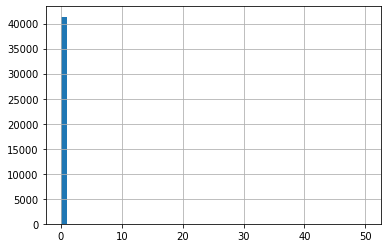

In [466]:
data_train['days_in_waiting_list'].hist(bins=50, range=(0, 50))

In [467]:
data_train['days_in_waiting_list'].value_counts()

0      41374
63        29
15        19
48        15
44        13
       ...  
13         1
45         1
81         1
160        1
14         1
Name: days_in_waiting_list, Length: 96, dtype: int64

In [468]:
data_test['days_in_waiting_list'].value_counts()

0      23359
71         6
60         6
59         5
46         5
       ...  
73         1
105        1
121        1
10         1
223        1
Name: days_in_waiting_list, Length: 74, dtype: int64

In [469]:
data_train.loc[data_train['days_in_waiting_list'] == 0, 'days_in_waiting_list'] = 0
data_train.loc[data_train['days_in_waiting_list'] != 0, 'days_in_waiting_list'] = 1

In [470]:
data_test.loc[data_test['days_in_waiting_list'] == 0, 'days_in_waiting_list'] = 0
data_test.loc[data_test['days_in_waiting_list'] != 0, 'days_in_waiting_list'] = 1

In [471]:
data_train['days_in_waiting_list'].value_counts()

0    41374
1      445
Name: days_in_waiting_list, dtype: int64

In [472]:
data_train.rename(columns={'days_in_waiting_list': 'was_in_waiting_list'}, inplace=True)
data_test.rename(columns={'days_in_waiting_list': 'was_in_waiting_list'}, inplace=True)

У нас есть четыре типа клиента:
- Contract — договор с юридическим лицом;
- Group — групповой заезд;
- Transient — не связано с договором или групповым заездом;
- Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

Не будем их трогать.

In [474]:
data_train['customer_type'].value_counts()

Transient          33879
Transient-Party     5881
Contract            1808
Group                251
Name: customer_type, dtype: int64

In [475]:
data_test['customer_type'].value_counts()

Transient          21023
Transient-Party     2045
Contract             314
Group                139
Name: customer_type, dtype: int64

В количестве необходимых парковочных мест тоже уберем строчки с маленькими значениями.

In [476]:
data_train['required_car_parking_spaces'].value_counts()

0    38434
1     3375
2        9
3        1
Name: required_car_parking_spaces, dtype: int64

In [477]:
data_test['required_car_parking_spaces'].value_counts()

0    22225
1     1287
2        6
8        2
3        1
Name: required_car_parking_spaces, dtype: int64

In [478]:
data_train = data_train.query('required_car_parking_spaces <= 1')
data_test = data_test.query('required_car_parking_spaces <= 1')

In [479]:
data_train.rename(columns={'required_car_parking_spaces': 'is_parking_space_required'}, inplace=True)
data_test.rename(columns={'required_car_parking_spaces': 'is_parking_space_required'}, inplace=True)

Сократим количество специальных отметок до 3.

In [480]:
data_train['total_of_special_requests'].value_counts()

0    21420
1    13901
2     5513
3      888
4       79
5        8
Name: total_of_special_requests, dtype: int64

In [481]:
data_test['total_of_special_requests'].value_counts()

0    11007
1     8274
2     3343
3      774
4      102
5       12
Name: total_of_special_requests, dtype: int64

In [482]:
data_train = data_train.query('total_of_special_requests <= 3')
data_test = data_test.query('total_of_special_requests <= 3')

Количество проведенных ночей оставляем без изменений.

In [483]:
data_train['total_nights'].value_counts()

3    9365
1    8967
2    8142
4    7013
5    3483
7    3200
6    1552
Name: total_nights, dtype: int64

In [484]:
data_test['total_nights'].value_counts()

3    5696
4    4420
2    4335
1    4243
5    2012
7    1865
6     827
Name: total_nights, dtype: int64

Выведем снова данные о таблицах. Мы убрали порядка 10% данных из обеих таблиц, что является допустимым значением.

In [485]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41722 entries, 0 to 65228
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     41722 non-null  int64  
 1   lead_time                       41722 non-null  float64
 2   arrival_date_year               41722 non-null  int64  
 3   arrival_date_month              41722 non-null  object 
 4   arrival_date_week_number        41722 non-null  int64  
 5   arrival_date_day_of_month       41722 non-null  int64  
 6   stays_in_weekend_nights         41722 non-null  int64  
 7   stays_in_week_nights            41722 non-null  int64  
 8   adults                          41722 non-null  float64
 9   children                        41722 non-null  float64
 10  has_babies                      41722 non-null  float64
 11  meal                            41722 non-null  object 
 12  country                         

In [486]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23398 entries, 0 to 32411
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     23398 non-null  int64  
 1   lead_time                       23398 non-null  float64
 2   arrival_date_year               23398 non-null  int64  
 3   arrival_date_month              23398 non-null  object 
 4   arrival_date_week_number        23398 non-null  int64  
 5   arrival_date_day_of_month       23398 non-null  int64  
 6   stays_in_weekend_nights         23398 non-null  int64  
 7   stays_in_week_nights            23398 non-null  int64  
 8   adults                          23398 non-null  float64
 9   children                        23398 non-null  float64
 10  has_babies                      23398 non-null  float64
 11  meal                            23398 non-null  object 
 12  country                         

In [487]:
data_train.reset_index(drop=True, inplace=True)

In [488]:
data_test.reset_index(drop=True, inplace=True)

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

Перейдем к расчету прибыли гостиниц. Для начала определим несколько постоянных значений.

Значения ROOM определяют стоимость номера в зависимости от его типа.

In [489]:
ROOM_A = 1000
ROOM_B = 800
ROOM_C = 600
ROOM_D = 550
ROOM_E = 500
ROOM_F = 450
ROOM_G = 350

SERVICE - это расходы на обслуживание номера в зависимости от его типа.

In [490]:
SERVICE_A = 400
SERVICE_B = 350
SERVICE_C = 350
SERVICE_D = 150
SERVICE_E = 150
SERVICE_F = 150
SERVICE_G = 150

Также введем два сезонных коэффициента - для лета (+40%) и весны/осени (+20%).

In [491]:
summer = ['June', 'July', 'August']
spring_autumn = ['March', 'April', 'May', 'September', 'October', 'November']

In [492]:
SUMMER_MULT = 1.4
SPRING_MULT = 1.2

In [493]:
def income_data(data):
    # создадим столбец revenue, в котором будут храниться значения выручки от каждого номера в зависимости от типа
    data.loc[data['reserved_room_type'] == 'A', 'revenue'] = ROOM_A
    data.loc[data['reserved_room_type'] == 'B', 'revenue'] = ROOM_B
    data.loc[data['reserved_room_type'] == 'C', 'revenue'] = ROOM_C
    data.loc[data['reserved_room_type'] == 'D', 'revenue'] = ROOM_D
    data.loc[data['reserved_room_type'] == 'E', 'revenue'] = ROOM_E
    data.loc[data['reserved_room_type'] == 'F', 'revenue'] = ROOM_F
    data.loc[data['reserved_room_type'] == 'G', 'revenue'] = ROOM_G
    
    # создадим аналогичный столбец для стоимости обслуживания
    data.loc[data['reserved_room_type'] == 'A', 'costs'] = SERVICE_A
    data.loc[data['reserved_room_type'] == 'B', 'costs'] = SERVICE_B
    data.loc[data['reserved_room_type'] == 'C', 'costs'] = SERVICE_C
    data.loc[data['reserved_room_type'] == 'D', 'costs'] = SERVICE_D
    data.loc[data['reserved_room_type'] == 'E', 'costs'] = SERVICE_E
    data.loc[data['reserved_room_type'] == 'F', 'costs'] = SERVICE_F
    data.loc[data['reserved_room_type'] == 'G', 'costs'] = SERVICE_G
    
    # создадим столбец с сезонным коэффициентом
    # для зимы зададим значение 1
    data.loc[data['arrival_date_month'] == 'June', 'mult'] = SUMMER_MULT
    data.loc[data['arrival_date_month'] == 'July', 'mult'] = SUMMER_MULT
    data.loc[data['arrival_date_month'] == 'August', 'mult'] = SUMMER_MULT
    data.loc[data['arrival_date_month'] == 'March', 'mult'] = SPRING_MULT
    data.loc[data['arrival_date_month'] == 'April', 'mult'] = SPRING_MULT
    data.loc[data['arrival_date_month'] == 'May', 'mult'] = SPRING_MULT
    data.loc[data['arrival_date_month'] == 'September', 'mult'] = SPRING_MULT
    data.loc[data['arrival_date_month'] == 'October', 'mult'] = SPRING_MULT
    data.loc[data['arrival_date_month'] == 'November', 'mult'] = SPRING_MULT
    data['mult'] = data['mult'].fillna(1)
    
    return data

In [494]:
data = income_data(data_train)

In [495]:
data = income_data(data_test)

In [496]:
data_train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,booking_changes,was_in_waiting_list,customer_type,is_parking_space_required,total_of_special_requests,total_nights,revenue,costs,mult
0,0,7.0,2015,July,27,1,0,1,1.0,0.0,...,A,0,0,Transient,0,0,1,1000.0,400.0,1.4
1,0,14.0,2015,July,27,1,0,2,2.0,0.0,...,A,0,0,Transient,0,1,2,1000.0,400.0,1.4
2,0,0.0,2015,July,27,1,0,2,2.0,0.0,...,C,0,0,Transient,0,0,2,600.0,350.0,1.4
3,0,9.0,2015,July,27,1,0,2,2.0,0.0,...,C,0,0,Transient,0,1,2,600.0,350.0,1.4
4,1,85.0,2015,July,27,1,0,3,2.0,0.0,...,A,0,0,Transient,0,1,3,1000.0,400.0,1.4


In [497]:
data_test.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,booking_changes,was_in_waiting_list,customer_type,is_parking_space_required,total_of_special_requests,total_nights,revenue,costs,mult
0,1,74.0,2017,January,1,1,1,0,2.0,0.0,...,A,0,0,Transient,0,0,1,1000.0,400.0,1.0
1,1,62.0,2017,January,1,1,2,2,2.0,0.0,...,A,0,0,Transient,0,1,4,1000.0,400.0,1.0
2,1,71.0,2017,January,1,1,2,2,1.0,0.0,...,A,0,0,Transient,0,1,4,1000.0,400.0,1.0
3,1,172.0,2017,January,1,1,2,5,2.0,0.0,...,A,0,0,Transient,0,0,7,1000.0,400.0,1.0
4,1,52.0,2017,January,1,1,2,5,1.0,0.0,...,A,0,0,Transient,0,0,7,1000.0,400.0,1.0


Напишем функцию для определения прибыли.

In [498]:
def income_count(data):
    # выручка с номера = стоимость номера * количество ночей * сезонный коэффициент
    # расходы на номер = стоимость обслуживания * сезонный коэффициент * количество уборок
    # по условию, если клиент снял номер на долго, то уборка осуществляется каждые два дня
    revenue = data['revenue'] * data['total_nights'] * data['mult']
    costs = data['costs'] * ((data['total_nights'] // 2) + 1)
    # оценим убытки при отмене бронирования
    loss = 0 - (data['revenue'] * data['mult'] + data['costs'])
    # прибыль, если бронирование не отменено
    income = revenue - costs
    
    # введем условие отмены или удачного бронирования
    data.loc[data['is_canceled'] == 0, 'income'] = income
    data.loc[data['is_canceled'] == 1, 'income'] = loss
    
    # посчитает общую прибыль
    total_income = income.sum() + loss.sum()
    
    return total_income

In [499]:
total_income = income_count(data_train)
total_income

46885880.0

In [500]:
total_income = income_count(data_test)
income_test_0 = total_income

По условию, наша модель должна окупиться за тестовый период. Прибыль на тестовой выборке без внедрений депозитов составляет 29 млн руб.

### Шаг 4. Разработка модели ML

Перейдем к разработке модели.

In [501]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41722 entries, 0 to 41721
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     41722 non-null  int64  
 1   lead_time                       41722 non-null  float64
 2   arrival_date_year               41722 non-null  int64  
 3   arrival_date_month              41722 non-null  object 
 4   arrival_date_week_number        41722 non-null  int64  
 5   arrival_date_day_of_month       41722 non-null  int64  
 6   stays_in_weekend_nights         41722 non-null  int64  
 7   stays_in_week_nights            41722 non-null  int64  
 8   adults                          41722 non-null  float64
 9   children                        41722 non-null  float64
 10  has_babies                      41722 non-null  float64
 11  meal                            41722 non-null  object 
 12  country                         

In [502]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=500)

In [503]:
data_train_ordinal = pd.DataFrame(encoder.fit_transform(data_train), columns=data_train.columns)

In [504]:
data_test_ordinal = pd.DataFrame(encoder.transform(data_test), columns=data_test.columns)

In [505]:
data_train_ordinal

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,was_in_waiting_list,customer_type,is_parking_space_required,total_of_special_requests,total_nights,revenue,costs,mult,income
0,0.0,7.0,0.0,5.0,26.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,6.0,2.0,2.0,51.0
1,0.0,14.0,0.0,5.0,26.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.0,6.0,2.0,2.0,81.0
2,0.0,0.0,0.0,5.0,26.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,4.0,1.0,2.0,50.0
3,0.0,9.0,0.0,5.0,26.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.0,4.0,1.0,2.0,50.0
4,1.0,85.0,0.0,5.0,26.0,0.0,0.0,3.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,2.0,6.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41717,0.0,23.0,1.0,2.0,52.0,29.0,2.0,4.0,1.0,0.0,...,0.0,0.0,2.0,0.0,2.0,5.0,3.0,0.0,0.0,100.0
41718,0.0,53.0,1.0,2.0,52.0,30.0,2.0,3.0,1.0,0.0,...,0.0,0.0,2.0,0.0,3.0,4.0,3.0,0.0,0.0,91.0
41719,0.0,7.0,1.0,2.0,52.0,30.0,2.0,4.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,5.0,3.0,0.0,0.0,100.0
41720,0.0,17.0,1.0,2.0,52.0,29.0,2.0,5.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,6.0,6.0,2.0,0.0,133.0


In [506]:
data_test_ordinal

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,was_in_waiting_list,customer_type,is_parking_space_required,total_of_special_requests,total_nights,revenue,costs,mult,income
0,1.0,74.0,500.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,6.0,2.0,0.0,3.0
1,1.0,62.0,500.0,4.0,0.0,0.0,2.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,1.0,3.0,6.0,2.0,0.0,3.0
2,1.0,71.0,500.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,3.0,6.0,2.0,0.0,3.0
3,1.0,172.0,500.0,4.0,0.0,0.0,2.0,5.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,6.0,6.0,2.0,0.0,3.0
4,1.0,52.0,500.0,4.0,0.0,0.0,2.0,5.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,6.0,6.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23393,0.0,188.0,500.0,1.0,34.0,30.0,2.0,3.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,4.0,6.0,2.0,2.0,135.0
23394,0.0,164.0,500.0,1.0,34.0,30.0,2.0,4.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,5.0,6.0,2.0,2.0,137.0
23395,0.0,21.0,500.0,1.0,34.0,29.0,2.0,5.0,1.0,0.0,...,0.0,0.0,2.0,0.0,2.0,6.0,6.0,2.0,2.0,138.0
23396,0.0,23.0,500.0,1.0,34.0,29.0,2.0,5.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,6.0,6.0,2.0,2.0,138.0


Разделим данные на признаки и целевой признак (is_canceled - отменено бронирование или нет).

In [508]:
data_train_ordinal.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'has_babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'was_in_waiting_list', 'customer_type',
       'is_parking_space_required', 'total_of_special_requests',
       'total_nights', 'revenue', 'costs', 'mult', 'income'],
      dtype='object')

In [509]:
features_train = data_train_ordinal.drop(['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 
                                    'arrival_date_day_of_month', 'total_nights', 
                                    'revenue', 'costs', 'mult', 'income'], 
                           axis=1)
target_train = data_train_ordinal['is_canceled']

In [510]:
features_test = data_test_ordinal.drop(['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 
                                    'arrival_date_day_of_month', 'total_nights', 
                                    'revenue', 'costs', 'mult', 'income'], 
                           axis=1)
target_test = data_test_ordinal['is_canceled']

У нас уже есть тестовые данные. Поэтому разделим обучающую таблицу на собственно обучающую и валидационную выборки в соотношении 75:25.

In [512]:
print(features_train.shape)
print(features_test.shape)

(41722, 19)
(23398, 19)


Приведем все признаки к единому масштабу.

In [513]:
numeric = features_train.columns

In [514]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [515]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Мы решаем задачу классификации - будет ли отменено бронирование или нет. Выберем для этого соответствующие модели. Рассмотрим две из них - решающее дерево и случайный лес.

Для решающего дерева найдем наилучшее значение глубины.

In [516]:
%%time

DTC_model = None
DTC_result = 0

for depth in range(1, 10):
    for leaf in range(1, 10):
        model = DecisionTreeClassifier(random_state=12345, min_samples_leaf=leaf, max_depth=depth, 
                                       class_weight='balanced')
        scores = cross_val_score(model, features_train, target_train, scoring='recall')
        result = scores.mean()

        if result > DTC_result:
            DTC_model = model
            DTC_result = result

CPU times: user 23.4 s, sys: 7.78 ms, total: 23.4 s
Wall time: 23.4 s


In [517]:
DTC_result

0.9213701783626806

In [518]:
DTC_model

DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=12345)

Для глубины дерева 19 получили оценку качества 0.839

Проделаем похожу операцию для случайного леса

In [524]:
%%time

RFC_model = None
RFC_result = 0

for est in range(1, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, 
                                       class_weight='balanced')
        scores = cross_val_score(model, features_train, target_train, scoring='recall')
        result = scores.mean()

        if result > RFC_result:
            RFC_model = model
            RFC_result = result

CPU times: user 28.5 s, sys: 87.8 ms, total: 28.6 s
Wall time: 28.6 s


In [525]:
RFC_result

0.8511384050236689

In [526]:
RFC_model

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=1,
                       random_state=12345)

Модель случайного леса дала более высокий результат - 0.87.

Выведем отдельно ее предсказания и переведем ее в формат Series.

In [530]:
DTC_model.fit(features_train, target_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=12345)

In [531]:
predictions_test = DTC_model.predict(features_test)

In [532]:
predictions_test = pd.Series(predictions_test)

Оценим адекватность модели. Ранее мы уже определили, что класс 0 встречается более чем в два раза чаще 1.

In [533]:
class_frequency = predictions_test.value_counts(normalize=True)
class_frequency

1.0    0.815839
0.0    0.184161
dtype: float64

Проверим, насколько точно работала бы модель, предсказывая только 0.

In [534]:
target_pred_constant = pd.Series(0, index=target_test.index)
accuracy_score(target_test, target_pred_constant)

0.678391315497051

Качество заметно упало.

Подробнее посмотрим на дисбаланс классов и построим матрицу ошибок.

In [535]:
confusion_matrix(target_test, predictions_test)

array([[ 3895, 11978],
       [  414,  7111]])

Модель достаточно часто ошибается, предсказывая 0 при правильном ответе 1.

Оценим качество модели методом кросс-валидации.

Подадим на вход необученную модель

In [552]:
model = DecisionTreeClassifier(random_state=12345)

In [553]:
%%time

scores = cross_val_score(model, features_train, target_train, cv=100)
final_score = sum(scores) / len(scores)
final_score

CPU times: user 16.1 s, sys: 0 ns, total: 16.1 s
Wall time: 16.6 s


0.7141902172042269

Несмотря на то, что мы получили высокое значение recall, среднее качество модели оказалось несколько ниже.

Отдельно проверим качество модели на тестовой выборке.

In [554]:
predictions_test = DTC_model.predict(features_test)

In [555]:
#print(accuracy_score(target_test, predictions_test))
print(recall_score(target_test, predictions_test))
#print(precision_score(target_test, predictions_test))
#print(f1_score(target_test, predictions_test))

0.944983388704319


In [556]:
predictions_test = pd.Series(predictions_test)

In [557]:
data_test['predictions'] = predictions_test

In [558]:
def profit(row):
    if row['is_canceled'] == 0:
        revenue = row['revenue'] * row['total_nights'] * row['mult']
        costs = row['costs'] * ((row['total_nights'] // 2) + 1)
    else:
        revenue = 0
        costs = row['revenue'] * row['mult'] + row['costs']
        if row['predictions'] == 1:
            revenue = (row['revenue'] * row['mult'] + row['costs']) * 0.8
            costs = row['revenue'] * row['mult'] + row['costs']
    
    return revenue - costs

In [559]:
data_test['profit'] = data_test.apply(profit, axis=1)
data_test['profit'].sum()

37522772.0

In [560]:
income_test_0

29070080.0

In [561]:
data_test['profit'].sum() / income_test_0

1.2907694784465678

In [562]:
state = np.random.RandomState(12345)

In [563]:
values = []
count = int(len(data_test) * 12/8)
for i in range(1000):
    subsample = data_test.sample(
            count, 
            replace=True, 
            random_state=state
        )
    values.append(subsample['profit'].sum() - 400_000)
values = pd.Series(values)

In [564]:
mean = values.mean()
#risk = st.percentileofscore(values, 0)
#lower = values.quantile(0.005)
#upper = values.quantile(0.995)

In [565]:
print(mean)
#print(risk)
#print(lower)
#print(upper)

55888323.64


Средняя прибыль получилась еще выше.

### Шаг 5. Опишите портрет «ненадёжного» клиента

На основе имеющихся у нас данных составим портрет "ненадежного" клиента, сколнного к отмене брони.

Отфильтруем значения в таблице так, чтобы оставить только отмененные брони, а также уберем посчитанные значения.

In [571]:
data_train_canceled = data_train.query('is_canceled == 1')

In [572]:
data_train_canceled = data_train_canceled.drop(['revenue', 'costs', 'mult', 'income'], axis=1)

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'has_babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'was_in_waiting_list'}>,
        <AxesSubplot:title={'center':'is_parking_space_required'}>],
       [<AxesSubplot:title=

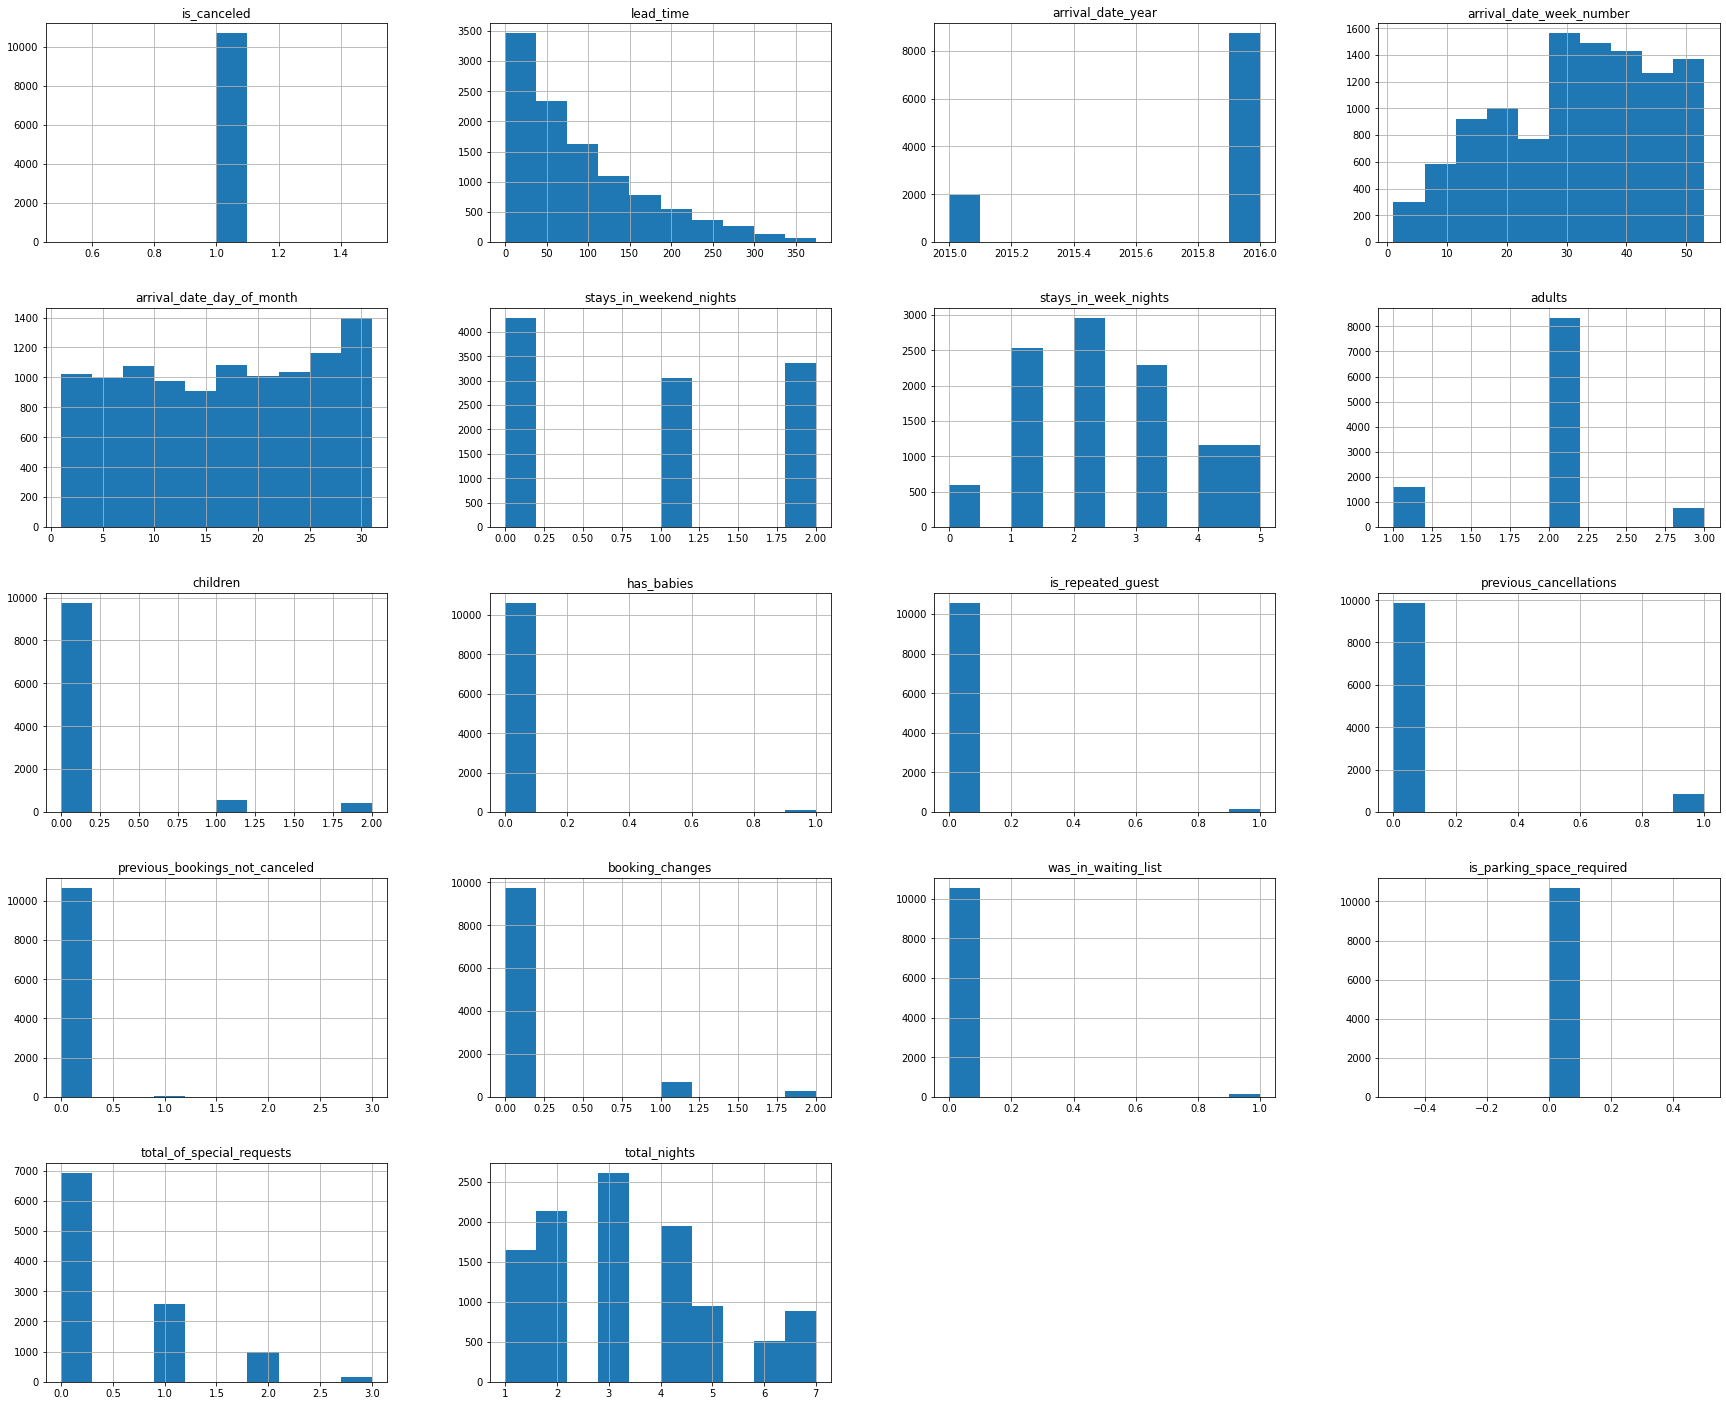

In [573]:
data_train_canceled.hist(figsize=(30, 25))

Опишем подробно значения таблицы.

Сложно проследить какую-то связь между датой брони и временем заезда. Ранее для общих данных мы увидели, что распределение такое же.

<AxesSubplot:>

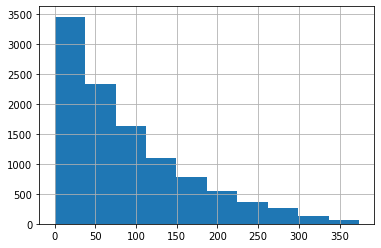

In [574]:
data_train_canceled['lead_time'].hist()

Больше всего отказников в летне-осенний период - июль-октябрь. Но в это же время в целом приезжает наибольшее число гостей.

In [575]:
data_train_canceled['arrival_date_month'].value_counts()

October      1316
August       1291
September    1268
July         1131
December     1082
April         855
November      849
May           775
March         760
June          731
February      402
January       222
Name: arrival_date_month, dtype: int64

Отказы примерно поровну распределены между теми, кто останавливается в будни и выходные.

In [576]:
data_train_canceled['stays_in_weekend_nights'].value_counts(normalize=True)

0    0.400393
2    0.314361
1    0.285246
Name: stays_in_weekend_nights, dtype: float64

При этом чаще все-таки отменяют бронь клиенты, планировавшие остаться на срок не более трех дней.

In [577]:
data_train_canceled['stays_in_week_nights'].value_counts(normalize=True)

2    0.276446
1    0.236847
3    0.213911
5    0.109062
4    0.108313
0    0.055420
Name: stays_in_week_nights, dtype: float64

Больше всего отказов среди пар.

In [578]:
data_train_canceled['adults'].value_counts()

2.0    8329
1.0    1583
3.0     770
Name: adults, dtype: int64

Можно сказать, что гости с детьми более надежные.

In [579]:
data_train_canceled[['children', 'has_babies']].value_counts()

children  has_babies
0.0       0.0           9678
1.0       0.0            525
2.0       0.0            404
0.0       1.0             63
1.0       1.0              7
2.0       1.0              5
dtype: int64

Большинство отказывающихся от брони делают ее с завтраком.

In [580]:
data_train_canceled['meal'].value_counts()

BB    8361
SC    1518
HB     766
FB      37
Name: meal, dtype: int64

In [581]:
data_train_canceled['country'].value_counts()

PRT      4854
ESP       844
FRA       729
GBR       694
ITA       581
DEU       440
Other     408
BRA       290
IRL       208
CHN       185
BEL       169
USA       168
NLD       156
CHE       139
RUS        84
SWE        79
CN         75
AUT        67
ISR        66
TUR        60
POL        57
ROU        45
NOR        42
MAR        38
LUX        38
AGO        38
FIN        33
HUN        31
DNK        27
AUS        24
JPN        13
Name: country, dtype: int64

Посетителей по странам можно разделить на две группы - PRT (Португали, скорее всего локация нашей сети отелей) и все остальные. Разделим их на домашних посетителей, куда отнесем PRT, и иностранных (всех остальных).

In [582]:
data_train.loc[data_train['country'] == 'PRT', 'country'] = 'home'
data_train.loc[data_train['country'] != 'home', 'country'] = 'foreign'

In [583]:
data_train_canceled.loc[data_train_canceled['country'] == 'PRT', 'country'] = 'home'
data_train_canceled.loc[data_train_canceled['country'] != 'home', 'country'] = 'foreign'

На общих данных видно среди постояльцев больше иностранцев.

In [584]:
data_train['country'].value_counts(normalize=True)

foreign    0.676022
home       0.323978
Name: country, dtype: float64

При этом отказываются от брони чаще всего свои.

In [585]:
data_train_canceled['country'].value_counts()

foreign    5828
home       4854
Name: country, dtype: int64

In [586]:
origin_share = data_train_canceled['country'].value_counts() / data_train['country'].value_counts()
origin_share

foreign    0.206630
home       0.359103
Name: country, dtype: float64

In [587]:
data_train_canceled['is_repeated_guest'].value_counts()

0    10551
1      131
Name: is_repeated_guest, dtype: int64

In [588]:
data_train_canceled['previous_cancellations'].value_counts(normalize=True)

0    0.922767
1    0.077233
Name: previous_cancellations, dtype: float64

In [589]:
data_train_canceled['previous_bookings_not_canceled'].value_counts()

0    10645
1       22
2        8
3        7
Name: previous_bookings_not_canceled, dtype: int64

Вряд ли можно отнести к закономерностям то факт, что гость первый раз бронирует номер в этом отеле. Но среди отказников немало тех, кто ранее уже отказывался от брони.

Как ни странно, чаще всего отказываются от брони те, кто планировал остановиться в самом дорогом номере.

In [590]:
data_train_canceled['reserved_room_type'].value_counts()

A    7194
D    2327
E     467
F     319
G     170
B     166
C      39
Name: reserved_room_type, dtype: int64

Гости склонны сразу отменять бронь, а не вносить в нее сначала изменения.

In [591]:
data_train_canceled['booking_changes'].value_counts()

0    9727
1     685
2     270
Name: booking_changes, dtype: int64

Как правило отказываются частные гости, не связанные с договорами или группами.

In [592]:
data_train_canceled['customer_type'].value_counts()

Transient          9294
Transient-Party    1008
Contract            361
Group                19
Name: customer_type, dtype: int64

Парковка отказникам не требовалась, также как и дополнительные условия при бронировании.

In [593]:
data_train_canceled['is_parking_space_required'].value_counts()

0    10682
Name: is_parking_space_required, dtype: int64

In [594]:
data_train_canceled['total_of_special_requests'].value_counts()

0    6918
1    2589
2    1002
3     173
Name: total_of_special_requests, dtype: int64

Отказ от брони чаще всего происходит при бронировании на 2-3 дня.

<AxesSubplot:>

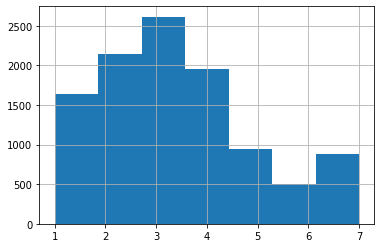

In [595]:
data_train_canceled['total_nights'].hist(bins=7)

In [596]:
data_train_canceled.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'has_babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'was_in_waiting_list', 'customer_type',
       'is_parking_space_required', 'total_of_special_requests',
       'total_nights'],
      dtype='object')

### Шаг 6. Напишите общий вывод

Мы провели исследование по заказу сети отелей «Как в гостях». У компании нет системы депозитов, из-за чего при отмене бронирования она терпит убытки. Наша задача заключалась в том, чтобы разработать систему, которая предсказывает отказ от брони и предлагает в таком случае внести депозит.

В нашем распоряжении было две таблицы с обучающими и тестовыми данными. В первой данные за 2015-2016 гг., во второй - 2017.

Мы проверили данные на пропуски и повторы, убрали редкие незначительные строки, исправили ошибки в написании.

Далее мы рассчитали прибыль для варианта без депозита. Для этого, по условию задачи, мы разделили номера по стоимостям категорий и затрат на обслуживание, ввели сезонный коэффициент. За 2015-2016 гг. прибыль отелей оставила 46,9 млн, в 2017 г. - 29 млн руб.

Для оценки прибыли после введения системы предоплаты номеров нам необходимо было решить задачу классификации, в результате которой модель предсказывала бы отказ от брони и предлагала клиенту внести депозит.

Для оценки качества модели мы использовали метрику recall. Она позволяет оценить количество верно угаданных положительных ответов среди всех положительных ответов. Это имеет наибольшее значение для бизнеса, так как в случае, если модель предскажет не отказ от брони, а клиент в итоге откажется, не внеся депозит, это приведет к убыткам компании.

Мы выбрали для расчета прибыли лучшую модель дерева решений со значением recall 0.92. На тестовой выборке метрика оказвалась чуть выше - 0.94. Среднее качество на кросс-валидации - 0.71. 

Тем не менее, модель показала, что по результатам внедрения системы депозитов прибыли отелей вырастет на 29%, до 37,5 млн. Мы также посчитали среднюю прибыль методом бутстрепа, Она оказалась еще выше - 55,9 млн. Разработка модели оправдывает заложенные на нее 400 тыс.

Единственное, что мы не можем предсказать в рамках этой задачи - это реакция клиента на предложение предоплаты. Откажется ли он от бронирования уже на этом этапе или нет.

В остальном система депозитов полностью себя оправдывает.

ПОРТРЕТ КЛИЕНТА

Мы также описали портрет клиента, склонного к отказу от брони.

Больше всего отказов, ожидаемо, происходит в сезон июль-октябрь. Отказы примерно поровну распределены между выходными и будними днями.

Чаще всего отказываются от брони те, кто планировал остаться на 2-3 дня. Среди отказников больше всего частных путешественников - пар без детей, забронировавших номер в самой дорогой категории. В основном они являются резидентами страны - локации отелей, иностранцы отказываются реже. 21% отказников ранее уже отказывался от брони. Парковка или другие дополнительные условия для отказавшихся от брони не требовались.